# Tut 13

This tutorial deals with time and space cordinates using the astropy module. 

Task:
1. Make a scatter plot of the position of the Sun in Horizontal Coordinates throughout the year. You may use the Ephemeris of the Sun from this link (Geocentric Ephemeris for the Sun, Moon and Planets Courtesy of Fred Espenak, www.Astropixels.com).
The resulting plot is called an Analemma. Change up the position on Earth (latitude) and do the same calculation. How does changing latitude change the Analemma?

2. Choose an object (any that you want) and plot its altitude throughout the night (local night; you will have to add 5 hours 30 minutes to UTC).
Use the following coordinates for calculation in part 2: Indian Astronomical Observatory (Hanle, Ladakh) Coordinates: 32.7908° N, 79.0002° E Height above Sea Level: 4500 m


In [151]:
import requests
import numpy as np
from astropy.time import Time
page = requests.get("http://astropixels.com/ephemeris/sun/sun2019.html")  #get webpage data
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
#imports



In [152]:
def signchecker(a,b,c): # takes string(a), int b,c as hours, minutes and seconds coordinates. Returns the total value in hours
    if a[0] != '-':
        return int(a) + b/60 + c/3600
    else:
        return int(a) - b/60 - c/3600
    return 0

def time_normalizer(arr): # For negative values of time, converts them to positive
    for i in range(len(arr)):
        if arr[i] < 0:
            arr[i] += 24
    return arr
            




In [154]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
sun_data = soup.find_all('pre')
# read the webpage and find the table items

ra = np.zeros(365)
dec = np.zeros(365)
gst_list = []
days_till_now = 0
time = []

for i in sun_data:        
    text = i.get_text() #extract lines of text
    listy = text.split() #get list of items
    number_of_days = len(listy[41:])/16           #use length of list to find number of days
    for j in range(41,int(41+number_of_days*16),16):   #iterate over each day
        gst = listy[j+3]
        gst_vals = gst.split(':')
        gst = signchecker(gst_vals[0],int(gst_vals[1]),float(gst_vals[2])) #get time data(gst)
        ra_val = signchecker(listy[j+5],int(listy[j+6]),float(listy[j+7]))  #get right ascension data
        dec_val = signchecker(listy[j+8],int(listy[j+9]),float(listy[j+10]))  #get declination data
        ra[int(days_till_now + (j-41)/16)]= ra_val-gst  #change ra data according to gst, add ra data to the array
        dec[int(days_till_now + (j-41)/16)]= dec_val   #add dec data to the array
        gst_list.append(gst)  #store gst data is a list
        time_jd = float(listy[j+2])  #get time in julian day format
        time.append(time_jd)  #store time data in a list
        
    days_till_now += number_of_days

ra = time_normalizer(ra)  #normalize ra values to remove negative values


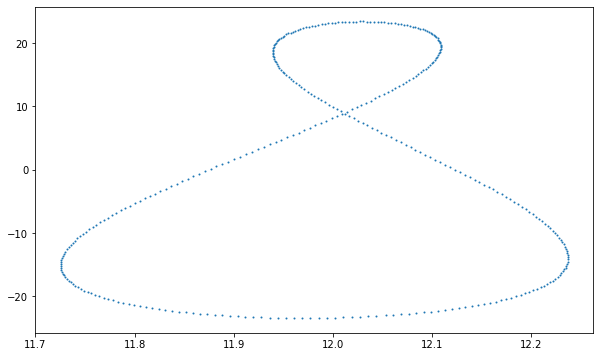

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.scatter(ra,dec,s=1)
#plot the analemma

In [174]:
hor_coordinates = []

for i in range(len(ra)):     #convert the equitorial coordinates to horizontal coordinates using the location and time
    coord = SkyCoord(360*ra[i]/24,dec[i],unit = 'deg')
    bear_mountain = EarthLocation(lat=90*u.deg, lon=-74*u.deg, height=390*u.m)
    time_main = Time('8000', format = 'mjd') 
    altaz = coord.transform_to(AltAz(obstime=time_main,location=bear_mountain))
    hor_coordinates.append(altaz)

    
    
    

In [175]:
l_az = np.zeros(365)
l_alt = np.zeros(365)

for i in range(len(hor_coordinates)):
    l_az[i] = (hor_coordinates[i].az*u.deg).value
    l_alt[i] = (hor_coordinates[i].alt*u.deg).value

print(l_az)
print(l_alt)

# find the list of coordinates in azimuth and altitude form



[307.68008813 307.56253095 307.44583915 307.33104885 307.21741316
 307.10592683 306.99584304 306.88819815 306.78266008 306.67893822
 306.5780277  306.47905734 306.38314688 306.28942516 306.19884617
 306.11066323 306.02574752 305.94380878 305.86443223 305.7884893
 305.71523337 305.64557755 305.57860924 305.51524167 305.45464524
 305.39765037 305.34392548 305.29297292 305.24574787 305.20133763
 305.16061451 305.12283178 305.08877892 305.05766764 305.03032908
 305.00634867 304.98531178 304.96809128 304.95381569 304.94323337
 304.93559741 304.93169781 304.93057984 304.9331583  304.9389354
 304.94741319 304.95938205 304.97405309 304.99209206 305.01262683
 305.03648951 305.06264153 305.09191508 305.12335454 305.15770904
 305.19452185 305.23321135 305.27465153 305.31788637 305.3637068
 305.41115659 305.46110996 305.51261051 305.56640774 305.62208611
 305.679105   305.7382557  305.7985813  305.86091479 305.92429908
 305.98948396 306.05563707 306.123425   306.1924317  306.262116
 306.33322789 3

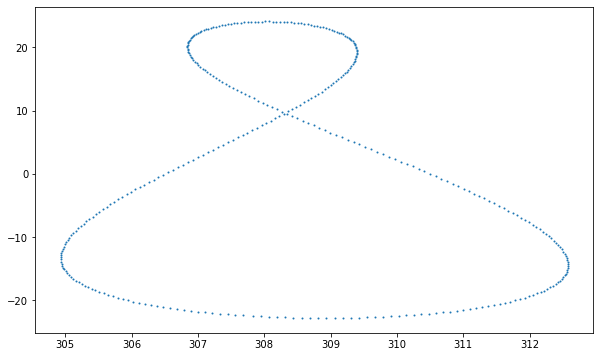

In [176]:
plt.figure(figsize = (10,6))
plt.scatter(l_az,l_alt,s=1)
#plot the annalema

In [179]:
# part 2

In [191]:
def hr_min(h,m):    # returns time string given the hours and minutes value
    if h < 10:
        if m < 10:
            return '0' + str(h) + ':0' + str(m)
        else:
            return '0' + str(h) + ':' + str(m)
    else:
        if m < 10:
            return str(h) + ':0' + str(m)
        else:
            return str(h) + ':' + str(m)
    

In [192]:
hor_coordinates = []
coord = SkyCoord(360*5.2423/24,-8.2017,unit = 'deg')
hanle = EarthLocation(lat=32.7908*u.deg, lon=79.0002*u.deg, height=390*u.m) #coordinates of hanle
h,minute = 0, 0



for i in range(24*60):  #iterate over every minute of the day
    if minute >= 60:
        h += 1
        minute -= 60
    
    time_non_date = hr_min(h,minute) + ':00' #create a time string for the given time
    
    time_main = Time('1999-01-01T' + time_non_date, format = 'isot') #create time object
    altaz = coord.transform_to(AltAz(obstime=time_main,location=hanle))  #perform conversion to alt-az based on time and location
    hor_coordinates.append(altaz)
    minute += 1




In [193]:
l_az = np.zeros(24*60)
l_alt = np.zeros(24*60)

for i in range(len(hor_coordinates)):
    l_az[i] = (hor_coordinates[i].az*u.deg).value
    l_alt[i] = (hor_coordinates[i].alt*u.deg).value

    
#create lists of the data in azimuth altitude format

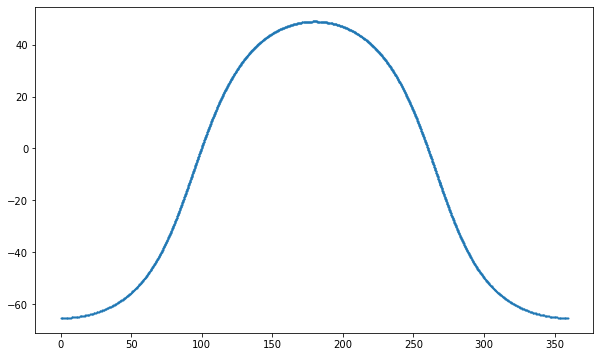

In [194]:
plt.figure(figsize = (10,6))
plt.scatter(l_az,l_alt,s=1)
#plot the path through the sky